## Predicting The Quality of Red Wine Data

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import warnings #ignore warnings
warnings.filterwarnings('ignore')

In [2]:
red_wine_data = pd.read_csv('https://raw.githubusercontent.com/btkhimsar/DataSets/master/winequality-red.csv',sep=";")

In [3]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine_data.shape

(1599, 12)

### Observations:

*  Dataset comprises 1599 observations(rows) and 12 features(columns).
*  Out of the 12, one is the target variable and rest 11 are input variables

### Get a Statistical Overview using Describe

* The describe() function in pandas is very handy in getting various summary statistics. 
* This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [5]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Let's explore different statistical measures that we have got from describe().

* count: total count of non-null values in the column
* mean: the average of all the values in that column
* min: the minimum value in the column
* max: the maximum value in the column
* 25%: first quartile in the column after we arrange those values in ascending order
* 50%: this is the median or the second quartile
* 75%: the third quartile
* std: this is the standard deviation (i.e. measure of depreciation, you must have read in the basics of statistics study material) Note: 25%, 50%, and 75% are nothing but corresponding percentile values

## Observations:
 * Here as you can notice the mean value is less than the median value of each column. Median is represented by 50%(50th         percentile) in the index column.This signifies the presence of Outliers. For example, a data set includes values: 30, 31, 32,   and 2. The mean value (23.75), which is lower than the median of the data (30.5), is greatly affected by the extreme data       point(2).
* There is notably a large difference between 75th %tile and max values of predictors “residual sugar”, ” free sulfur dioxide”,   total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of         values( up to 75th %tile)
* Thus, the observations 1 and 2 suggest that there are extreme values i.e Outliers in our dataset.

## Exploring the Features/Variables

In [6]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Target Variable:

* The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. It is the variable that is, or should be the output.

* Here quality is the target variable as we're trying to know which of the two types of wines have better quality.

## Input Variables:

* One or more variables that are used to determine (or predict) the 'Target Variable' are known as Input Variables. They are sometimes called Predictor Variable as well.

* In our example, the input variables are: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', and 'alcohol

## Unique Values of Quality(Target Variable)

In [7]:
red_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

## Observations:

* Few key insights just by looking at the target variable are as follows:

* Target variable/Dependent variable is discrete and categorical in nature.
* “quality” score scale ranges from 1 to 10; 1 being poor and 10 being the best.
* 1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8.

## Frequency Counts of each Quality Value

In [8]:
red_wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Observations:

* This tells us the vote count of each quality score in descending order.
* “quality” has most values concentrated in the categories 5, 6 and 7.
* Only a few observations made for the categories 3 & 8.

 ## Renaming Columns

* rename() is used to rename the columns
* parameters .rename(columns = {'old_name':'new_name'},inplace= True)
* inplace =True makes change in the dataframe itself.

In [9]:
red_wine_data.rename(columns= {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
      'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide',})

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Checking for Missing Values

In [10]:
red_wine_data.isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
red_wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###  Observation: There is no missing value in any column

###  info()

* df.info returns information about the data frame including the data types of each column, number of null values in each column and memory usage of the entire data.

In [12]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Visualization Or Graphical Representation

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### Separating Input and Target Variables

In [14]:
y = red_wine_data['quality']
X = red_wine_data.drop(red_wine_data['quality'],inplace= True)

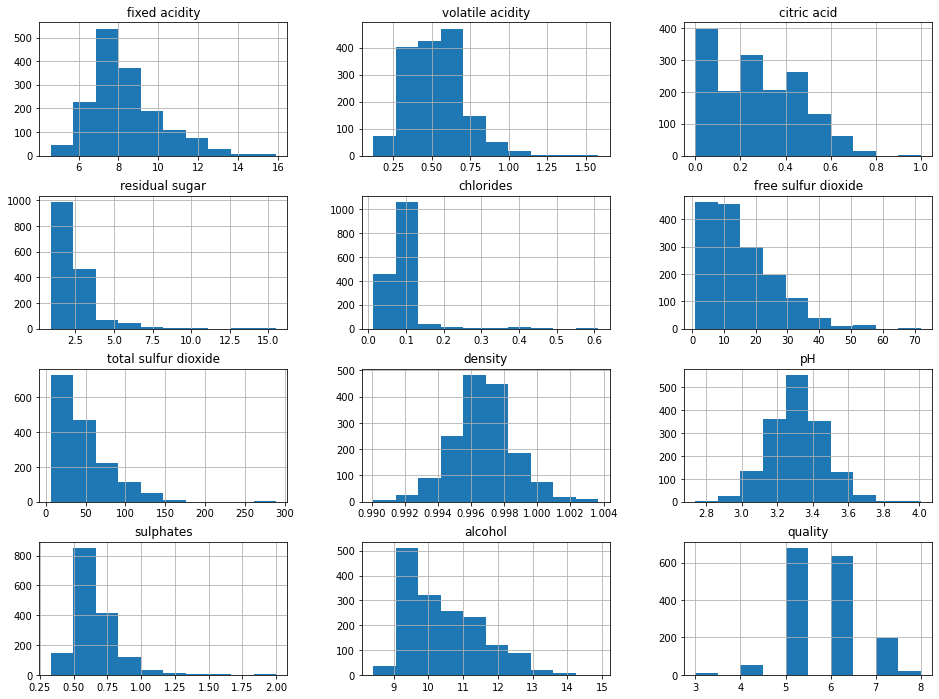

In [15]:
red_wine_data.hist(bins=10,figsize=(16,12))
plt.show()

### Observations:

* The distribution of the attribute “alcohol” seems to be positively skewed i.e the curve is shifted towards the left.
* The attributes 'density' and 'pH' are quite normally distributed.
* Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.

In [16]:
red_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.254398,0.671410,0.114616,0.093650,-0.154536,-0.114387,0.668582,-0.682678,0.182851,-0.062303,0.124330
volatile acidity,-0.254398,1.000000,-0.551206,0.002691,0.061790,-0.009841,0.077683,0.022580,0.233098,-0.260545,-0.201714,-0.391616
citric acid,0.671410,-0.551206,1.000000,0.142135,0.203428,-0.062613,0.033668,0.365729,-0.540720,0.311429,0.107572,0.228214
residual sugar,0.114616,0.002691,0.142135,1.000000,0.054904,0.186785,0.202718,0.355577,-0.084971,0.003772,0.040552,0.014504
chlorides,0.093650,0.061790,0.203428,0.054904,1.000000,0.005293,0.047110,0.200734,-0.265023,0.370793,-0.222395,-0.128786
free sulfur dioxide,-0.154536,-0.009841,-0.062613,0.186785,0.005293,1.000000,0.667660,-0.021810,0.071316,0.051157,-0.070349,-0.050443
total sulfur dioxide,-0.114387,0.077683,0.033668,0.202718,0.047110,0.667660,1.000000,0.070902,-0.065474,0.042388,-0.206664,-0.184133
density,0.668582,0.022580,0.365729,0.355577,0.200734,-0.021810,0.070902,1.000000,-0.342598,0.148474,-0.496641,-0.174029
pH,-0.682678,0.233098,-0.540720,-0.084971,-0.265023,0.071316,-0.065474,-0.342598,1.000000,-0.196103,0.207645,-0.057320
sulphates,0.182851,-0.260545,0.311429,0.003772,0.370793,0.051157,0.042388,0.148474,-0.196103,1.000000,0.091686,0.253019


<AxesSubplot:>

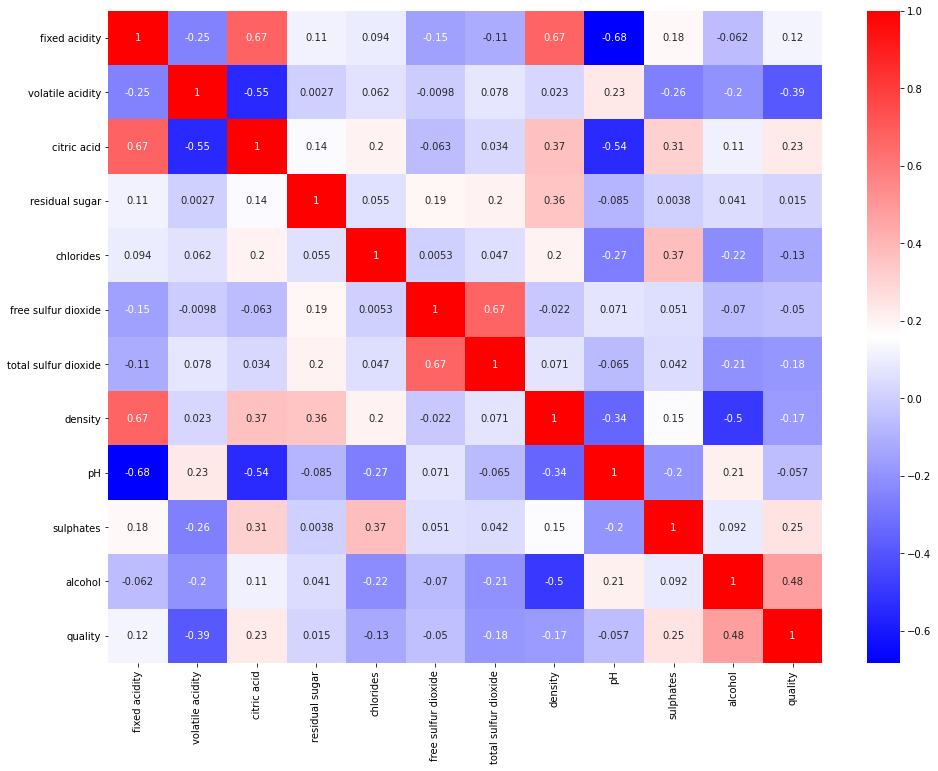

In [17]:
plt.figure(figsize=(16,12))
sns.heatmap(red_wine_data.corr(),cmap='bwr',annot=True)

### Observations:

* Alcohol has the highest positive correlation with wine quality, followed by the various other variables such as acidity, sulphates, density & chlorides.
* There is a relatively high positive correlation between fixed_acidity and citric_acid, fixed_acidity and density.
* There is a relatively high negative correlation between fixed_acidity and pH.
* Density has a strong positive correlation with fixed_acidity, whereas it has a strong negative correlation with alcohol.
* citric acid & volatile acidity have negative correlation.
* free sulphur dioxide & total sulphur dioxide have positive correlation.

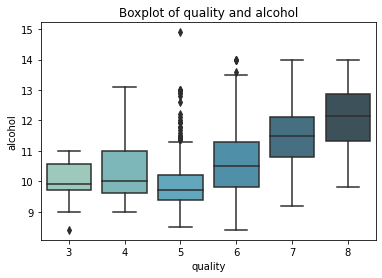

In [18]:
sns.boxplot(y,red_wine_data['alcohol'],palette='GnBu_d')
plt.title("Boxplot of quality and alcohol")
plt.show()

### Observation:

* The above plot shows the increase in the quality of wine with an increase in alcohol. The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine, the better will be the quality.
* Also, the points lying outside the whiskers(the lines extending from the rectangular box) are the outliers

### Now, Predicting Red Wine Quality using:

* Random Forest Classifier

In [19]:
#Defining X and y
X = red_wine_data.drop(['quality'], axis=1)
y = red_wine_data['quality']

In [20]:
# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

In [21]:
# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1274, 11)
y_train: (1274,)
X_test: (319, 11)
y_test: (319,)


In [22]:
# 1. Using Random Forest Classifier

# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Random Forest Classifier Accuracy: 65.8307210031348 %
